## PSD of BaroData

In [1]:
import matplotlib.pyplot as plt
import pickle, os


from andbro__querrySeismoData import __querrySeismoData
from obspy import UTCDateTime, read, Stream
from scipy.signal import welch
from numpy import log10, zeros, append, linspace, mean, median, array, where, transpose, shape, histogram
from pandas import DataFrame, concat, Series, date_range, to_pickle
from pathlib import Path
from andbro__load_FURT_stream import __load_furt_stream

import warnings
warnings.filterwarnings('ignore')

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [3]:
path = "/import/kilauea-data/LNM2/infrasound/"

## Load Data

In [4]:
files = os.listdir(path)

st0 = Stream()
for file in files:

    st = read(path+file+"/*")
    st = st.merge()
    st = st.select(channel="*3")
    st0+=st

st0.detrend("demean")

st0.plot(equal_scale=False);

IsADirectoryError: [Errno 21] Is a directory: '/import/kilauea-data/LNM2/infrasound/2023/BW'

## Write Data

In [5]:
from pandas import date_range
from andbro__write_stream_to_sds import __write_stream_to_sds

for dt in date_range("2023-03-01", "2023-03-11"):
    print(dt)
    st00 = st0.copy();
    st00 = st00.select(channel="CH3").merge();

    t1, t2 = UTCDateTime(dt), UTCDateTime(dt)+86400-st00[0].stats.delta/2

    st00.trim(t1, t2);
    st00[0].stats.network = "BW";
    st00[0].stats.station = "DINO";
    st00[0].stats.location = "";
    st00[0].stats.channel = "BDI";

    # st00.write(path+"/2023/BW/DINO/BDI.D/"+f"BW.DINO..BDI.D.{t1.year}.{str(t1.julday).rjust(3, '0')}", "MSEED");
    __write_stream_to_sds(st00, path)

    print(st00);

2023-03-01 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-01T00:00:04.000000Z - 2023-03-01T23:59:59.980000Z | 50.0 Hz, 4319800 samples

creating: /import/kilauea-data/LNM2/infrasound/2023/
creating: /import/kilauea-data/LNM2/infrasound/2023/BW/
creating: /import/kilauea-data/LNM2/infrasound/2023/BW/DINO/
creating: /import/kilauea-data/LNM2/infrasound/2023/BW/DINO/BDI.D
 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.060
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-01T00:00:04.000000Z - 2023-03-01T23:59:59.980000Z | 50.0 Hz, 4319800 samples
2023-03-02 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-02T00:00:00.000000Z - 2023-03-02T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.061
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-02T00:00:00.000000Z - 2023-03-02T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-03 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-03T00:00:00.000000Z - 2023-03-03T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.062
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-03T00:00:00.000000Z - 2023-03-03T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-04 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-04T00:00:00.000000Z - 2023-03-04T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.063
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-04T00:00:00.000000Z - 2023-03-04T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-05 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-05T00:00:00.000000Z - 2023-03-05T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.064
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-05T00:00:00.000000Z - 2023-03-05T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-06 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-06T00:00:00.000000Z - 2023-03-06T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.065
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-06T00:00:00.000000Z - 2023-03-06T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-07 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-07T00:00:00.000000Z - 2023-03-07T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.066
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-07T00:00:00.000000Z - 2023-03-07T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-08 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-08T00:00:00.000000Z - 2023-03-08T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.067
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-08T00:00:00.000000Z - 2023-03-08T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-09 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-09T00:00:00.000000Z - 2023-03-09T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.068
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-09T00:00:00.000000Z - 2023-03-09T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-10 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-10T00:00:00.000000Z - 2023-03-10T23:59:59.980000Z | 50.0 Hz, 4320000 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.069
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-10T00:00:00.000000Z - 2023-03-10T23:59:59.980000Z | 50.0 Hz, 4320000 samples
2023-03-11 00:00:00


1 Trace(s) in Stream:
FI.FBR.00.CH3 | 2023-03-11T00:00:00.000000Z - 2023-03-11T00:00:03.860000Z | 50.0 Hz, 194 samples

 -> stored stream as: 2023/BW/DINO/BDI.D/BW.DINO..BDI.D.2023.070
1 Trace(s) in Stream:
BW.DINO..BDI | 2023-03-11T00:00:00.000000Z - 2023-03-11T00:00:03.860000Z | 50.0 Hz, 194 samples


# IROMY DATA

3 Trace(s) in Stream:
BW.IROMY..BDF | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples
BW.IROMY..BDI | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples
BW.IROMY..BDO | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples


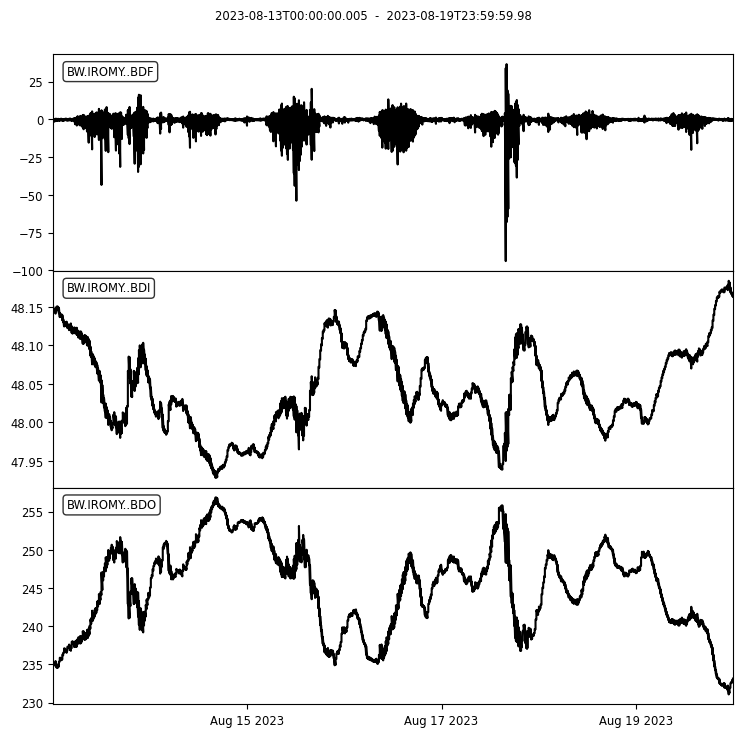

In [19]:
from andbro__read_sds import __read_sds
from obspy import read_inventory

tbeg, tend = "2023-08-13","2023-08-20"

st = __read_sds("/import/kilauea-data/LNM2/mb2000/sds/", "BW.IROMY..BD*", tbeg, tend)

for tr in st:
    tr.data = tr.data /1.0 /6.28099e5 /0.02  # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity_mb2005=0.02 V/Pa

print(st)

st.plot(equal_scale=False);

In [18]:
# inv = read_inventory("/home/brotzer/Documents/ROMY/ROMY_infrasound/IROMY.xml", format="STATIONXML", level="response")
# inv = read_inventory("/home/brotzer/Documents/ROMY/ROMY_infrasound/IROMY_resp.xml", format="STATIONXML", level="response")